In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('E:/PDFs/Class Room/names_dataset.csv')
df.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


In [4]:
def feature_last(names):
    return names[-1]

first = lambda x:x[0].lower()

In [6]:
# Extract Features
# 1.last letter
df['last'] = df['name'].apply(feature_last)
df['First'] = df['name'].apply(first)

In [7]:
df.head()

,index,name,sex,last,First
0,0,Mary,F,y,m
1,1,Anna,F,a,a
2,2,Emma,F,a,e
3,3,Elizabeth,F,h,e
4,4,Minnie,F,e,m


In [8]:
import seaborn as sns

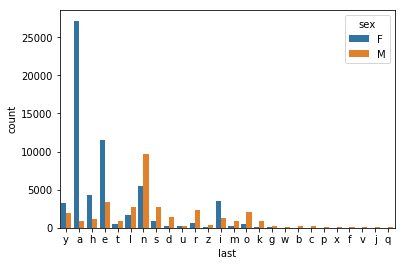

In [10]:
sns.countplot(x = 'last', data=df, hue='sex')

# N-grams

In [11]:
from nltk import ngrams

In [13]:
a = list(ngrams('srikanth',2))
a

[('s', 'r'),
 ('r', 'i'),
 ('i', 'k'),
 ('k', 'a'),
 ('a', 'n'),
 ('n', 't'),
 ('t', 'h')]

In [16]:
["".join(gram) for gram in a]


['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th']

In [17]:
def bigram(name):
    bi = list(ngrams(name,2))
    return ["".join(gram) for gram in bi]

In [18]:
bigram('ramkumar')

['ra', 'am', 'mk', 'ku', 'um', 'ma', 'ar']

In [19]:
def trigram(name):
    tri = list(ngrams(name,3))
    return ["".join(gram) for gram in tri]

In [20]:
trigram('ramkumar')

['ram', 'amk', 'mku', 'kum', 'uma', 'mar']

In [53]:
def feature(name):
    gram = bigram(name) + trigram(name) + [feature_last(name)]
    #print(gram)
    return gram

In [54]:
female = df[df['sex'] == 'F'].iloc[:1000]
male = df[df['sex'] == 'M'].iloc[:1000]

data = pd.concat((female,male),axis=0,ignore_index=True)
data.head()

,index,name,sex,last,First
0,0,Mary,F,y,m
1,1,Anna,F,a,a
2,2,Emma,F,a,e
3,3,Elizabeth,F,h,e
4,4,Minnie,F,e,m


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
index    2000 non-null int64
name     2000 non-null object
sex      2000 non-null object
last     2000 non-null object
First    2000 non-null object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [56]:
data['sex'].value_counts()

F    1000
M    1000
Name: sex, dtype: int64

In [57]:
# Extracting Features
fset = []
for name in data['name']:
    name = name.lower()
    f = feature(name)
    fset.extend(f)

In [58]:
len(set(fset))

2185

In [59]:
from collections import defaultdict

In [123]:
frame = defaultdict(lambda: defaultdict(lambda:0))

In [124]:
for name in data['name']:
    name = name.lower()
    for key in fset:
        frame[name][key] = 0

In [125]:
for name in data['name']:
    name = name.lower()
    f = feature(name)
    for fkey in f:
        frame[name][fkey] += 1

In [126]:
dframe = pd.DataFrame(frame).T
dframe.head()

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
aaron,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbie,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbott,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abby,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
dframe[dframe['a'].isnull()]

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi


In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
model = MultinomialNB()

In [130]:
x = dframe.iloc[:, :].values
y = data['sex'].values

In [135]:
x.shape

(2000, 2185)

In [132]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [133]:
model.score(x,y)

0.90300000000000002

### Test Model

In [134]:
name='Shiva'
def Predict_Gender(name):
    test = defaultdict(lambda: defaultdict(lambda:0))
    name = 'tarun'
    name = name.lower()
    for key in fset:
        frame[name][key] = 0
        
    f = feature(name)
    for fkey in f:
        if fkey in fset:
            test[name][fkey] += 1
            
test_array = pd.DataFrame(test).T.values

NameError: name 'test' is not defined

In [99]:
Predict_Gender('kiran')

'Male'